# Weather Data Preparation

In this notebook we clean and prepare the weather dataset for chicago in the year 2018 for the usage in later stages of our project.

## 1 Imports

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

%matplotlib inline

Load Weather Dataset

In [2]:
df_chicago_weather = pd.read_csv('../dataset/weather_hourly_chicago.csv')
df_chicago_weather.head()

,date_time,max_temp,min_temp,precip
0,2015-01-02 01:00:00,-1.7,-1.7,0.0
1,2015-01-02 02:00:00,-2.2,-2.2,0.0
2,2015-01-02 03:00:00,-2.8,-2.8,0.0
3,2015-01-02 04:00:00,-3.3,-3.3,0.0
4,2015-01-02 05:00:00,-4.4,-4.4,0.0


In [3]:
len(df_chicago_weather)

43848

## 2 NaN Values

In [4]:
df_chicago_weather.isnull().sum()

date_time    60
max_temp     60
min_temp     60
precip       58
dtype: int64

In [5]:
nan_values_for_max_temp = df_chicago_weather.loc[np.isnan(df_chicago_weather['max_temp'])]
print("There are", len(nan_values_for_max_temp), "NaN values for the key max_temp")
nan_values_for_max_temp

There are 60 NaN values for the key max_temp


,date_time,max_temp,min_temp,precip
1589,NaN,NaN,NaN,NaN
2537,NaN,NaN,NaN,NaN
3988,NaN,NaN,NaN,NaN
4013,NaN,NaN,NaN,NaN
4014,NaN,NaN,NaN,NaN
4015,NaN,NaN,NaN,NaN
4016,NaN,NaN,NaN,NaN
4017,NaN,NaN,NaN,NaN
4083,NaN,NaN,NaN,NaN
4084,NaN,NaN,NaN,NaN


The table shows that every row which contains a NaN value for max_temp also contains NaN values for all ther columns (except for two rows which have a value for precip). This explains the 60 NaN values for max_value, min_value and date_time and the 58 NaN values for precip. Since we have NaN values in every column of the dataframe removing columns is not an option. For now we remove all rows containing NaN values (so the 60 rows you see above). We deal with missing data later on

In [6]:
df_chicago_weather = df_chicago_weather.dropna(axis=0, inplace=False)

In [7]:
df_chicago_weather.isnull().sum()

date_time    0
max_temp     0
min_temp     0
precip       0
dtype: int64

## 3 Consistency 

In [8]:
df_chicago_weather.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43788 entries, 0 to 43847
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   date_time  43788 non-null  object 
 1   max_temp   43788 non-null  float64
 2   min_temp   43788 non-null  float64
 3   precip     43788 non-null  float64
dtypes: float64(3), object(1)
memory usage: 1.7+ MB


Columns max_temp, min_temp and precip are all floating point numbers, so they are consistent in terms of their datatype. The datatype of the date_time column is object. In the following we make sure that the datetime column contains valid and consistent dates.

### 3.1 Datetime

In order to check for the consistency of the datetimes we use the following function. The function tries to parse a date string using the datetime package and returns true if it managed to parse it without error.

In [9]:
def is_valid_datetime(date_string):
    try:
        datetime.strptime(date_string, '%Y-%m-%d %H:%M:%S')
        return True
    except ValueError:
        return False

In [10]:
df_chicago_weather.apply(lambda row: not is_valid_datetime(row['date_time']), axis = 1).sum()

0

As we can see all entries in the datetime column contain valid dates that all have the same format.

### 3.2 Precip

Precip is a dummy variable, which is equal to 1 if snow or rainfall was recorded for the given date and 0 otherwise. We already know the precip column only contains data of type float64, however we should also make sure it only contains values that are either 1 or 0.

In [11]:
def non_binary_precip_values(df):
    return df['precip'].apply(lambda x: not x == 0 and not x == 1)

non_binary_precip_values(df_chicago_weather).sum()

0

As we can see no entries in the precip column have a value that is not 1 or 0.

### 3.3 Min and Max Temperature

Regarding the max_temp and min_temp columns we already know only values of type float64 are present. Since technically any floating point number is a valid temperature in celsius we dont need to do any additional consistency checks regarding the datatype here.

In [12]:
df_chicago_weather.loc[df_chicago_weather['max_temp'] < df_chicago_weather['min_temp']]

,date_time,max_temp,min_temp,precip


Rows containing a larger value for the minimum temperature than for the maximum temperature should be removed. However, the dataframe contains no such data points.

In [13]:
df_chicago_weather['min_temp'].describe()

count    43788.000000
mean        10.672707
std         11.533530
min        -30.600000
25%          1.700000
50%         11.100000
75%         20.600000
max         36.100000
Name: min_temp, dtype: float64

In [14]:
df_chicago_weather['max_temp'].describe()

count    43788.000000
mean        10.741208
std         11.540262
min        -30.600000
25%          1.700000
50%         11.100000
75%         20.600000
max         36.100000
Name: max_temp, dtype: float64

The hottest and coolest temperature recorded in the dataset also seem reasonable.

## 4 Duplicates

### 4.1 Duplicate Rows

In [15]:
df_chicago_weather[df_chicago_weather.duplicated(keep=False)]

,date_time,max_temp,min_temp,precip
65,2015-01-03 18:00:00,0.6,0.6,1.0
66,2015-01-03 18:00:00,0.6,0.6,1.0
79,2015-01-04 08:00:00,0.6,0.6,1.0
80,2015-01-04 08:00:00,0.6,0.6,1.0
81,2015-01-04 10:00:00,0.0,0.0,1.0
...,...,...,...,...
43448,2019-12-16 08:00:00,-4.4,-4.4,1.0
43644,2019-12-24 13:00:00,0.6,0.6,0.0
43645,2019-12-24 13:00:00,0.6,0.6,0.0
43741,2019-12-28 14:00:00,2.2,1.7,0.0


There are 1328 duplicate rows in the dataset. We only keep the last recorded entry for duplicate rows. We choose to keep the last recorded entry over the first because a possible reason for duplicates might be rerecordings in the case of equipment malfunctions or similar issures. In such a situation the last recoreded entry should be the most trustworthy. 

In [16]:
df_chicago_weather = df_chicago_weather.drop_duplicates(keep='last')

In [17]:
df_chicago_weather[df_chicago_weather.duplicated(keep=False)]

,date_time,max_temp,min_temp,precip


### 4.2 Duplicate Dates

There are also multiple rows that have data for the same dates. For these instances we decided to take the average and remove duplicate entries.

In [18]:
df_chicago_weather[df_chicago_weather['date_time'].duplicated(keep=False)]

,date_time,max_temp,min_temp,precip
48,2015-01-04 00:00:00,0.6,0.6,1.0
50,2015-01-04 03:00:00,0.6,0.6,1.0
51,2015-01-04 03:00:00,1.1,0.6,1.0
55,2015-01-03 08:00:00,-0.6,-0.6,0.0
56,2015-01-03 08:00:00,-0.6,-1.1,1.0
...,...,...,...,...
43798,2019-12-30 23:00:00,-1.7,-1.7,1.0
43799,2019-12-30 23:00:00,-1.1,-1.7,1.0
43801,2020-01-01 02:00:00,-2.2,-2.2,0.0
43802,2020-01-01 02:00:00,-2.8,-2.8,0.0


In [19]:
df_chicago_weather = df_chicago_weather.groupby('date_time').mean().reset_index()

In [20]:
df_chicago_weather[df_chicago_weather['date_time'].duplicated(keep=False)]

,date_time,max_temp,min_temp,precip


Non binary values were introduced through the mean function.

In [21]:
non_binary_precip_values(df_chicago_weather).sum()

450

In [22]:
df_chicago_weather[df_chicago_weather.date_time == '2015-01-03 08:00:00']

,date_time,max_temp,min_temp,precip
49,2015-01-03 08:00:00,-0.6,-0.85,0.5


For all the non binary values introduced we check whether the introduced value is greater than 0. If that is the case that means that precipitation was recorded at least once in the data points used to compute the average. Accordingly, we set precip equal to 1 in those cases.

In [23]:
df_chicago_weather['precip'] = df_chicago_weather.apply(lambda row: 1 if row['precip'] > 0.5 else 0, axis = 1)

The binary property of the precip column was restored and no more duplicate date entries are part of the dataframe.

In [24]:
non_binary_precip_values(df_chicago_weather).sum()

0

In [25]:
df_chicago_weather[df_chicago_weather.date_time == '2015-01-03 08:00:00']

,date_time,max_temp,min_temp,precip
49,2015-01-03 08:00:00,-0.6,-0.85,0


In [26]:
df_chicago_weather[df_chicago_weather['date_time'].duplicated(keep=False)]

,date_time,max_temp,min_temp,precip


In [27]:
len(df_chicago_weather)

40960

## 5 Timerange

### 5.1 Filter for 2018

Since we have the bike data for Chicago in 2018 we want to filter the weather data for dates from the year 2018.

In [28]:
df_chicago_weather = df_chicago_weather.loc[
    df_chicago_weather.apply(
        lambda row: datetime.strptime(row['date_time'], '%Y-%m-%d %H:%M:%S').year == 2018, 
        axis = 1
    )
]
df_chicago_weather.head()

,date_time,max_temp,min_temp,precip
24639,2018-01-01 00:00:00,-13.9,-13.9,0
24640,2018-01-01 01:00:00,-15.0,-15.0,0
24641,2018-01-01 02:00:00,-15.6,-15.6,0
24642,2018-01-01 03:00:00,-16.7,-16.7,0
24643,2018-01-01 04:00:00,-17.2,-17.2,0


In [29]:
len(df_chicago_weather)

8137

### 5.2 Completeness

In [30]:
start = df_chicago_weather['date_time'].min()
print("Earliest date entry:", start)
end = df_chicago_weather['date_time'].max()
print("Latest date entry:", end)

Earliest date entry: 2018-01-01 00:00:00
Latest date entry: 2018-12-31 23:00:00


The earliest date recorded for 2018 is the First of January at midnight, while the latest is the 31st of December at 11pm.

In [31]:
date_range = pd.date_range(start, end, freq = 'H')

#for faster lookup
def get_missing_dates():
    out = []
    df_chicago_weather_indexed_by_date = df_chicago_weather.set_index('date_time')

    for date in date_range:
        try:
            df_chicago_weather_indexed_by_date.loc[date.strftime('%Y-%m-%d %H:%M:%S'),]
        except KeyError:
            out.append(date)
    return out
missing_dates = get_missing_dates()
len(missing_dates)

623

In the above mentioned time range there are 623 hours of missing data. That is almost 26 days of missing data. Regarding the absence of this data we considered two options:

1. We could either ignore that we do not have this data and deal with potential NaN values in later tasks or, 
2. Try to estimate the missing data points. 

In order to decide between the two options we first analyzed how well we could estimate these missing data points. When making an estimation for the weather for a specific date we want to avoid basing our estimation on data that is far away from the date, since the weather can be fairly dynamic and change a considerable amount in just a few hours. Preferably, we want to estimate the weather for a missing date x using either x - 1h or x + 1h (or both). This  means that long sequences of missing dates are disadvantageous as for dates towards the middle of the sequence no close data is available. 

#### Missing Date Spread

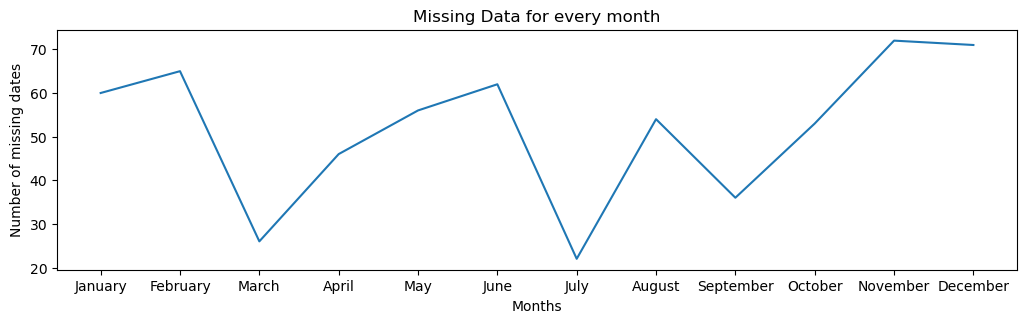

In [32]:
months = {'January': 0, 'February': 0, 'March': 0, 'April': 0, 
          'May': 0, 'June': 0, 'July': 0, 'August': 0, 
          'September': 0, 'October': 0, 'November': 0, 'December': 0}

for date in missing_dates:
    months[date.month_name()] = months[date.month_name()] + 1

Fig = plt.figure()
ax = Fig.add_axes([0.5, 0.5, 1.5, 0.5])
ax.plot(months.keys(), months.values())
ax.set_xlabel('Months')
ax.set_ylabel('Number of missing dates')
ax.set_title('Missing Data for every month')
plt.show()

As we can see there are missing dates for every month, they are spread out throughout the year and not concentrated on one or two single months.

#### Missing Date Sequences

In [33]:
tmp = 1
stacks = []
i = 0
for date in missing_dates:
    if i < len(missing_dates) - 1:
        r = pd.date_range(missing_dates[i], missing_dates[i + 1], freq = 'H')
        if len(r) == 2:
            tmp = tmp + 1
        else: 
            stacks.append(tmp)
            tmp = 1
        i = i + 1

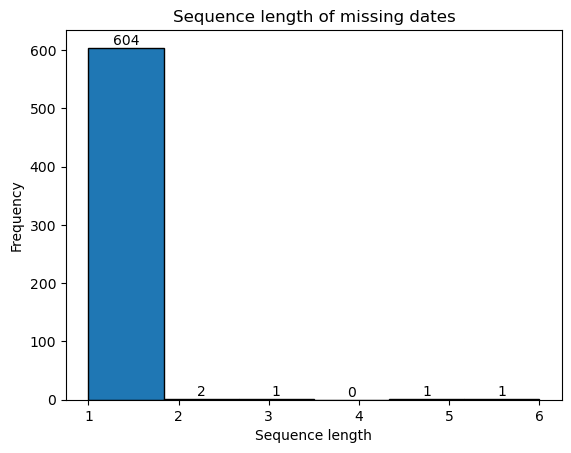

In [34]:
counts, edges, bars = plt.hist(stacks, bins = 6, edgecolor='k')
plt.bar_label(bars)
plt.xlabel('Sequence length')
plt.ylabel('Frequency')
plt.title('Sequence length of missing dates')
plt.show()

As we can see most of the time we only have a sequence of 1 missing date. Meaning for all of those dates we have two directly adjacent dates for which we have data available and can base estimations on. There are only a few sequences which are longer than 1, the maximum length of such a sequence is 6. So at worst we do not have data for a 6 hour period. Taking this into consideration using the argumentation from above we decided that it should be possible to estimate the weather for the missing dates without making estimations that are too innacurate.

#### Estimating Missing Dates

In [35]:
df_missing_dates = pd.DataFrame(missing_dates, columns = ['date_time'])

df_chicago_weather = pd.merge(
    df_chicago_weather, 
    df_missing_dates['date_time'].astype(str), 
    on = 'date_time', 
    how = 'outer'
)

In [36]:
len(get_missing_dates())

0

In [37]:
df_chicago_weather.tail(10)

,date_time,max_temp,min_temp,precip
8750,2018-12-29 03:00:00,NaN,NaN,NaN
8751,2018-12-29 07:00:00,NaN,NaN,NaN
8752,2018-12-29 10:00:00,NaN,NaN,NaN
8753,2018-12-29 12:00:00,NaN,NaN,NaN
8754,2018-12-29 20:00:00,NaN,NaN,NaN
8755,2018-12-29 22:00:00,NaN,NaN,NaN
8756,2018-12-30 03:00:00,NaN,NaN,NaN
8757,2018-12-30 12:00:00,NaN,NaN,NaN
8758,2018-12-31 16:00:00,NaN,NaN,NaN
8759,2018-12-31 21:00:00,NaN,NaN,NaN


In [38]:
df_chicago_weather = df_chicago_weather.sort_values(by='date_time')

We assume that the missing values for maximum and mimimum temperature are equally spaced an change linearly. Thus we use the 'linear' interpolation method. Regarding the precipitation we estimate rainfall or rather snow if precipitation was recorded for the previously available datetime. Accordingly, we use the 'ffill' method.

In [39]:
df_chicago_weather = df_chicago_weather.assign(
    max_temp = df_chicago_weather.max_temp.interpolate(method = 'linear', limit = 6)
)
df_chicago_weather = df_chicago_weather.assign(
    min_temp = df_chicago_weather.min_temp.interpolate(method = 'linear', limit = 6)
)
df_chicago_weather = df_chicago_weather.assign(precip=df_chicago_weather.precip.fillna(method = 'ffill'))

df_chicago_weather

,date_time,max_temp,min_temp,precip
0,2018-01-01 00:00:00,-13.9,-13.9,0.0
1,2018-01-01 01:00:00,-15.0,-15.0,0.0
2,2018-01-01 02:00:00,-15.6,-15.6,0.0
3,2018-01-01 03:00:00,-16.7,-16.7,0.0
4,2018-01-01 04:00:00,-17.2,-17.2,0.0
...,...,...,...,...
8133,2018-12-31 19:00:00,3.3,3.3,1.0
8134,2018-12-31 20:00:00,3.9,3.3,1.0
8759,2018-12-31 21:00:00,3.6,3.3,1.0
8135,2018-12-31 22:00:00,3.3,3.3,0.0


#### Recheck consistency of dataset

In [40]:
df_chicago_weather.isnull().sum()

date_time    0
max_temp     0
min_temp     0
precip       0
dtype: int64

In [41]:
df_chicago_weather[df_chicago_weather.duplicated(keep=False)]

,date_time,max_temp,min_temp,precip


In [42]:
df_chicago_weather[df_chicago_weather['date_time'].duplicated(keep=False)]

,date_time,max_temp,min_temp,precip


In [43]:
len(get_missing_dates())

0

## 6 Export 

In [52]:
df_chicago_weather.to_csv(r'../dataset/chicago_weather_2018.csv', index = False)